# Tarea 07: Derivadas 
## Métodos Computacionales: Taller
### Gabriel Cataño Sánchez

In [1]:
#LIBRERIAS

import numpy as np
import sympy as sp
import scipy as sc
import pandas as pd
import sympy as sp
from scipy import interpolate
from scipy.misc import derivative
from sympy import init_printing
import matplotlib.pylab as plt
init_printing() 

# Tarea Derivada

Los siguientes datos, son datos experimentales de un péndulo simple tomadas a través de una cámara web y procesados con el programa kinovea. Dados los datos en formato csv, se pide  construir un programa que realice lo siguiente: 

1. Leer el archivo csv a través de un Data Frame de Pandas, las columnas del data frame deberan ser:

col=["Tiempo[ms]", "AnguloDeg", "AnguloRad"]

2. Construya una grafica de :
plt.plot(df['Tiempo[ms]'], df['AnguloDeg'],"b-")

¿Qué puede concluir respecto al movimiento del pendulo?


3. Calculo la transformada de fourier de los datos obtenidos, para encontrar la frecuencia de oscilacion del sistema, para ello realice lo siguiente:

- importe la librerias de scipy fft, fftfreq.
- Aplique la transformada de fourier como sigue:

```
tf = fft(df['AnguloRad'].values)
T = 33E-3 #Paso del tiempo
N = len(df['Tiempo[ms]'])
xf = fftfreq(N, T)[:N//2]

plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"o-")
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0, 2)

```

-  Para las valores en el eje x y eje y de la anterior gráfica, realice una interpolación. 

- Encuentra el valor máximo empleando metodos de diferenciación.







In [2]:
#Dirección web del archivo csv

route = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT8btHZ-A6ChzV5Rx_CQmCzbhO10J7R6LvQAyHx9qOCoCDAL9RJgaGUATf2z5lTMo-SjByvrnaX02Cz/pub?output=csv"

#Lectura del archivo csv en DataFrame
df = pd.read_csv(route,";")

In [3]:
#Nombres de las columnas para después renombrar las columnas del DataFrame
col = ["Tiempo[ms]", "AnguloDeg", "AnguloRad"]
#1. Como hacer un rename 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

#2. Como pasar los valores del angulo que son tipo string a float 

In [4]:
#Asignación de las columdas del archivo a las columnas renombradas, visualización del DataFrame
df = df.rename(columns = {'Tiempo (ms)':"Tiempo[ms]", 'Ángulo 1,':'AnguloDeg'})
df

,Tiempo[ms],AnguloDeg
0,9,"59,289611816406"
1,42,"59,9823265075684"
2,75,"61,2374534606934"
3,108,"63,49247741699"
4,142,"65,3887710571289"
...,...,...
2842,94709,"94,9375762939453"
2843,94743,"96,479850769043"
2844,94776,"97,9406890869141"
2845,94809,"99,3180923461914"


In [5]:
#Para ver que los valores de lo ángulos no tiene formato float, punto flotante sino una ','
a="3.0"
(df["AnguloDeg"].values)

array(['59,289611816406', '59,9823265075684', '61,2374534606934', ...,
       '97,9406890869141', '99,3180923461914', '100,637817382813'],
      dtype=object)

In [7]:
#Reemplaza las comas por puntos de los valores
eval_= np.vectorize(eval )
d = eval_(df["AnguloDeg"].str.replace(",", "."))

In [8]:
#Corrobora que los valores hallan quedado en formato punto flotante
type(d[0])

numpy.float64

In [9]:
#Hacemos el reemplazo en la columna del DataFrame, cambiando las comas por puntos flotantes
df["AnguloDeg"] = df["AnguloDeg"].str.replace(",", ".").astype("float64")

In [10]:
#Columna con los ángulos en grados convertidos a radianes
df["AnguloRad"] = np.deg2rad(df["AnguloDeg"].values )

In [11]:
#Resta de pi/2 debido a la forma en que se tomaron los ángulos
df["AnguloRad"] = df["AnguloRad"] - np.pi/2

#Muestra los primeros valores del DataFrame completo
df.head()

,Tiempo[ms],AnguloDeg,AnguloRad
0,9,59.289612,-0.535997
1,42,59.982327,-0.523907
2,75,61.237453,-0.502001
3,108,63.492477,-0.462644
4,142,65.388771,-0.429547


No handles with labels found to put in legend.


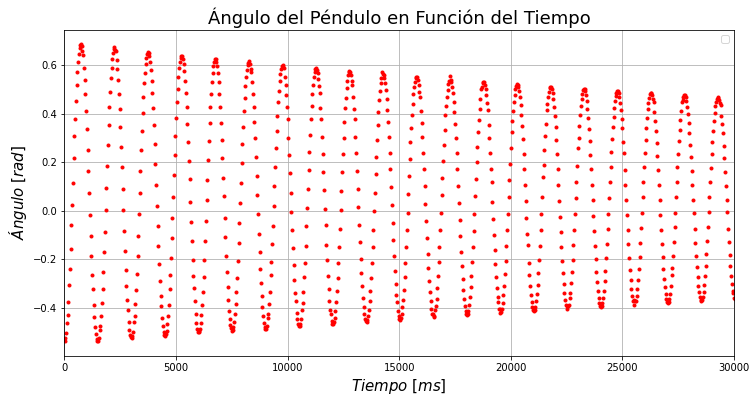

In [12]:
#Gráfico de la variación del ángulo en función del tiempo

plt.figure(figsize=(12,6))
plt.plot(df["Tiempo[ms]"], df["AnguloRad"], "r.")
plt.xlabel("$Tiempo$ $[ms]$", fontsize=15)
plt.ylabel("$Ángulo$ $[rad]$", fontsize=15)
plt.title("Ángulo del Péndulo en Función del Tiempo", fontsize=18)
plt.legend()
plt.grid()
plt.xlim(0, 30000 )

In [13]:
#Importar libreria para hacer la Transformada Rápida de Fourier 
from scipy.fft import fft, fftfreq

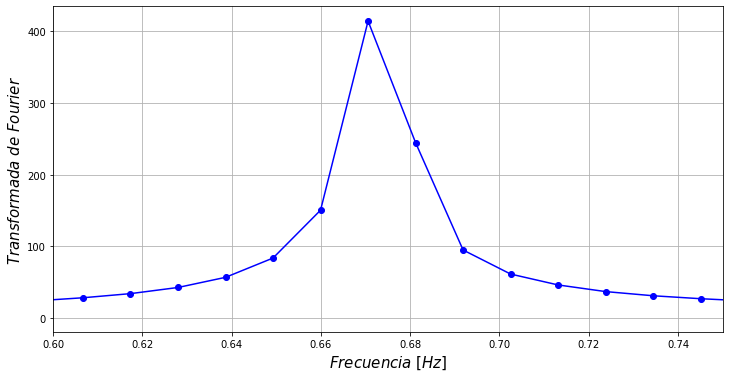

In [14]:
#Transformada de Fourier a los valores de los ángulos
tf = fft(df['AnguloRad'].values)
T = 33E-3 #Paso del tiempo
N = len(df['Tiempo[ms]'])

#Cálculo de las frecuencias
xf = fftfreq(N, T)[:N//2]

#Gráfica del valor absoluto de la transformada en función de la frecuencia
plt.figure(figsize=(12,6))
plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"bo-")
plt.ylabel("$Transformada$ $de$ $Fourier$", fontsize=15)
plt.xlabel("$Frecuencia$ $[Hz]$",fontsize=15)
plt.xlim(0.6, 0.75)
plt.grid()

In [15]:
#Libreria para hacer interpolación con spline cúbicos
from scipy.interpolate import CubicSpline

In [51]:
#Interpolación de la transformada y las frecuencias
cs = CubicSpline(xf[1:N//2], np.abs(tf[1:N//2]))

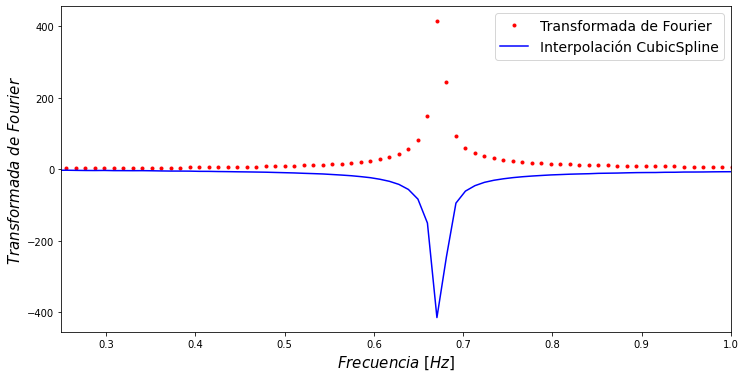

In [20]:
#Gráfica del valor absoluto de la transformada y de la interpolación multiplicada por menos
plt.figure(figsize=(12,6))
plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"r.", label="Transformada de Fourier")
plt.plot(abs(xf[1:N//2]), -abs(cs(xf[1:N//2])),"b", label= "Interpolación CubicSpline" )
plt.xlabel("$Frecuencia$ $[Hz]$", fontsize=15)
plt.ylabel("$Transformada$ $de$ $Fourier$", fontsize=15) 
plt.legend(fontsize=14)
plt.xlim(0.25, 1)

In [21]:
#Libreria para optimización de funciones
from scipy import optimize

In [48]:
#Interpolación de el negativo de la Transformada de Fourier y las frecuencias
cs1 = CubicSpline(xf[1:N//2], -np.abs(tf[1:N//2]))

#Halla el minimo de la función interpolada
min = optimize.fmin_powell(cs1, 0.2)

Optimization terminated successfully.
         Current function value: -417.867925
         Iterations: 2
         Function evaluations: 44


In [49]:
#Máximo de la Transformada de Fourier
abs(cs1(min))

In [24]:
#Punto donde se alcanza el máximo
min

array(0.67156)

In [60]:
#Interpolación de la Transformada con CubicSpline
P = CubicSpline(xf[1:N//2], np.abs(tf[1:N//2]))

#Derivada de la función interpolada 
dP = P.derivative()

#Cálculo de la raíz, para ver donde hay un máximo o mínimo en la función original
root = optimize.bisect(dP,0.6,0.7)
print(f"Punto crítico de la función en: {root:.5}")

#Evaluar la función en el punto crítico
p = P(root)
print(f"Valor de la función evaluada en el punto crítico: {p:.5} \n El valor hallado es máximo")

Punto crítico de la función en: 0.67156
Valor de la función evaluada en el punto crítico: 417.87 
 El valor hallado es máximo


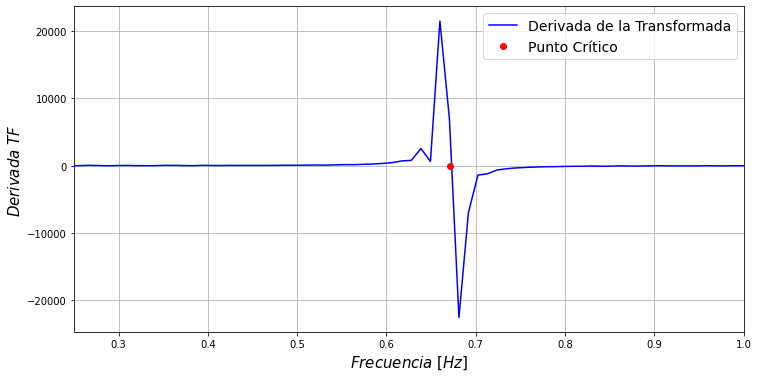

In [62]:
plt.figure(figsize=(12,6))
plt.plot(xf[1:N//2], dP(xf[1:N//2]), 'b-', label = "Derivada de la Transformada")
plt.plot(root, dP(root), 'ro', label= "Punto Crítico")
plt.xlabel("$Frecuencia$ $[Hz]$", fontsize=15)
plt.ylabel("$Derivada$ $TF$", fontsize=15)
plt.grid()
plt.legend(fontsize=14)
plt.xlim(0.25, 1)

Concluimos entonces que la frecuencia de oscilación del sistema es: $0.67$ $H$z, por lo tanto el periodo del péndulo es : $1.49$ $s$.